In [45]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Set visualization style
plt.style.use('seaborn-v0_8-darkgrid')  # or another seaborn variant
%matplotlib inline

In [61]:

# Load Dataset 1 (Nutritional Data)
df1 = pd.read_csv("C:/Users/midoo/OneDrive/Desktop/menu.csv")  # Replace with actual file path if needed
print("Dataset 1 - Nutritional Data:")

df1.info()

# Load Dataset 2 (Retail Sales Data)
df2 = pd.read_csv("C:/Users/midoo/OneDrive/Desktop/retail_sales_dataset.csv")  # Replace with actual file path if needed
print("\nDataset 2 - Retail Sales Data:")
df2.info()

Dataset 1 - Nutritional Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Category                       260 non-null    object 
 1   Item                           260 non-null    object 
 2   Serving Size                   260 non-null    object 
 3   Calories                       260 non-null    int64  
 4   Calories from Fat              260 non-null    int64  
 5   Total Fat                      260 non-null    float64
 6   Total Fat (% Daily Value)      260 non-null    int64  
 7   Saturated Fat                  260 non-null    float64
 8   Saturated Fat (% Daily Value)  260 non-null    int64  
 9   Trans Fat                      260 non-null    float64
 10  Cholesterol                    260 non-null    int64  
 11  Cholesterol (% Daily Value)    260 non-null    int64  
 12  Sodium              

In [92]:
df1.head()

,category,item,serving_size,calories,calories_from_fat,total_fat,total_fat_(%_daily_value),saturated_fat,saturated_fat_(%_daily_value),trans_fat,...,carbohydrates,carbohydrates_(%_daily_value),dietary_fiber,dietary_fiber_(%_daily_value),sugars,protein,vitamin_a_(%_daily_value),vitamin_c_(%_daily_value),calcium_(%_daily_value),iron_(%_daily_value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


In [94]:
df2.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Month
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50.0,150.0,2023-11
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500.0,1000.0,2023-02
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30.0,30.0,2023-01
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500.0,500.0,2023-05
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50.0,100.0,2023-05


In [67]:
# Check for missing values
print("Missing Values in Dataset 2:")
print(df2.isnull().sum())

# Convert 'Date' to datetime
df2['Date'] = pd.to_datetime(df2['Date'])

# Ensure numerical columns are correct type
df2['Quantity'] = df2['Quantity'].astype(int)
df2['Price per Unit'] = df2['Price per Unit'].astype(float)
df2['Total Amount'] = df2['Total Amount'].astype(float)

# Verify 'Total Amount' calculation
df2['Calculated Total'] = df2['Quantity'] * df2['Price per Unit']
discrepancies = df2[df2['Total Amount'] != df2['Calculated Total']]
print(f"Number of Total Amount discrepancies: {len(discrepancies)}")
if len(discrepancies) > 0:
    df2['Total Amount'] = df2['Calculated Total']  # Correct if needed

# Drop temporary column
df2 = df2.drop(columns=['Calculated Total'])

print("Cleaned Dataset 2 Info:")
print(df2.info())

Missing Values in Dataset 2:
Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64
Number of Total Amount discrepancies: 0
Cleaned Dataset 2 Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    1000 non-null   int64         
 1   Date              1000 non-null   datetime64[ns]
 2   Customer ID       1000 non-null   object        
 3   Gender            1000 non-null   object        
 4   Age               1000 non-null   int64         
 5   Product Category  1000 non-null   object        
 6   Quantity          1000 non-null   int32         
 7   Price per Unit    1000 non-null   float64       
 8   Total Amount      1000 non-null   float64     

In [70]:
# Check for missing values
print("Missing Values in Dataset 1:")
print(df1.isnull().sum())

# Standardize column names (optional)
df1.columns = df1.columns.str.replace(' ', '_').str.lower()

print("Cleaned Dataset 1 Info:")
print(df1.info())

Missing Values in Dataset 1:
Category                         0
Item                             0
Serving Size                     0
Calories                         0
Calories from Fat                0
Total Fat                        0
Total Fat (% Daily Value)        0
Saturated Fat                    0
Saturated Fat (% Daily Value)    0
Trans Fat                        0
Cholesterol                      0
Cholesterol (% Daily Value)      0
Sodium                           0
Sodium (% Daily Value)           0
Carbohydrates                    0
Carbohydrates (% Daily Value)    0
Dietary Fiber                    0
Dietary Fiber (% Daily Value)    0
Sugars                           0
Protein                          0
Vitamin A (% Daily Value)        0
Vitamin C (% Daily Value)        0
Calcium (% Daily Value)          0
Iron (% Daily Value)             0
dtype: int64
Cleaned Dataset 1 Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 24

In [72]:
# Descriptive statistics for numerical columns
print("Descriptive Statistics for Dataset 2:")
print(df2.describe())

# Categorical columns
print("\nUnique Product Categories:")
print(df2['Product Category'].value_counts())
print("\nGender Distribution:")
print(df2['Gender'].value_counts())

Descriptive Statistics for Dataset 2:
       Transaction ID                           Date         Age     Quantity  \
count     1000.000000                           1000  1000.00000  1000.000000   
mean       500.500000  2023-07-03 00:25:55.200000256    41.39200     2.514000   
min          1.000000            2023-01-01 00:00:00    18.00000     1.000000   
25%        250.750000            2023-04-08 00:00:00    29.00000     1.000000   
50%        500.500000            2023-06-29 12:00:00    42.00000     3.000000   
75%        750.250000            2023-10-04 00:00:00    53.00000     4.000000   
max       1000.000000            2024-01-01 00:00:00    64.00000     4.000000   
std        288.819436                            NaN    13.68143     1.132734   

       Price per Unit  Total Amount  
count     1000.000000   1000.000000  
mean       179.890000    456.000000  
min         25.000000     25.000000  
25%         30.000000     60.000000  
50%         50.000000    135.000000  
75% 

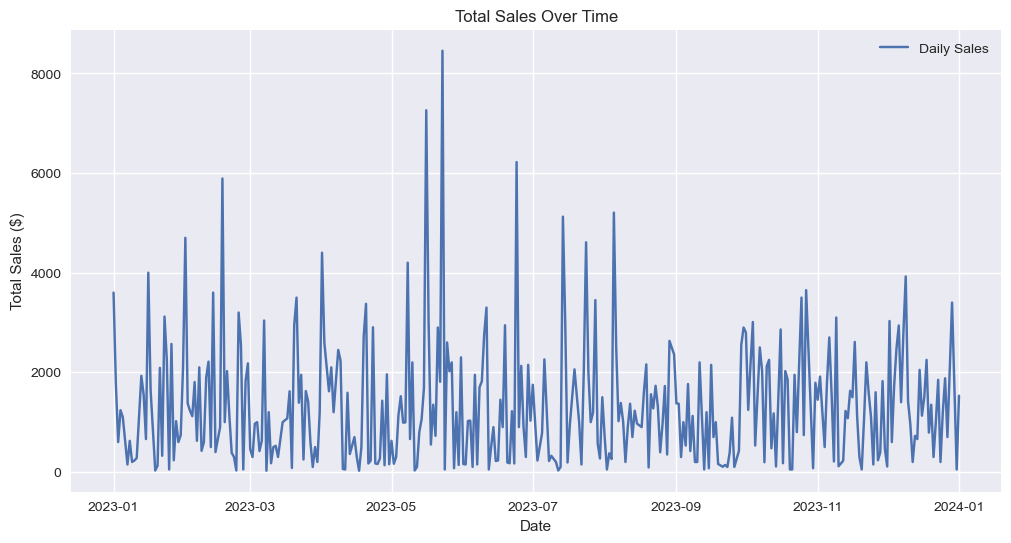

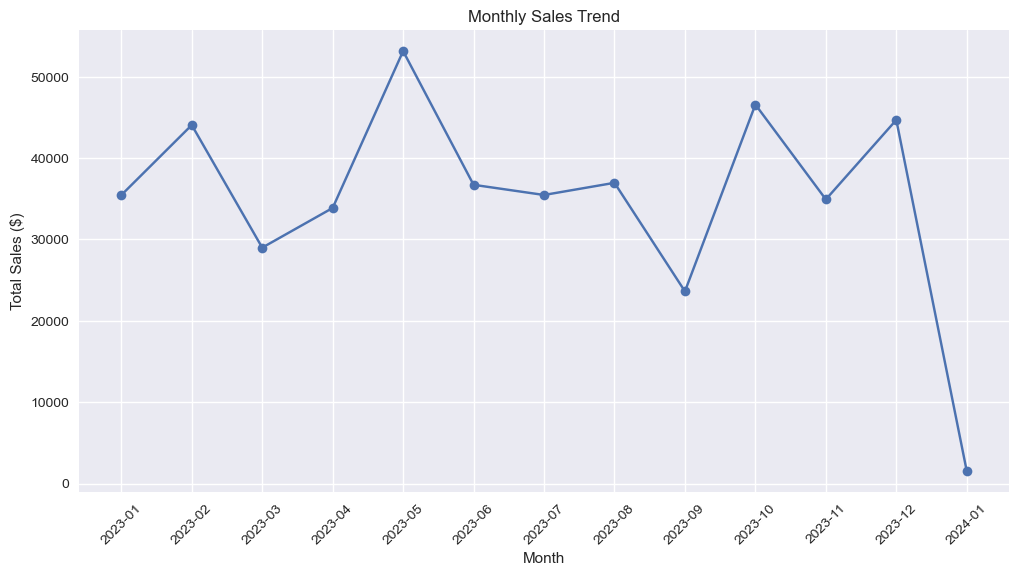

In [100]:
# Aggregate sales by date
daily_sales = df2.groupby('Date')['Total Amount'].sum().reset_index()

# Plot total sales over time
plt.figure(figsize=(12, 6))
plt.plot(daily_sales['Date'], daily_sales['Total Amount'], label='Daily Sales')
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales ($)')
plt.legend()
plt.show()

# Monthly sales trend
df2['Month'] = df2['Date'].dt.to_period('M')
monthly_sales = df2.groupby('Month')['Total Amount'].sum().reset_index()
monthly_sales['Month'] = monthly_sales['Month'].astype(str)

plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['Month'], monthly_sales['Total Amount'], marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45)
plt.show()

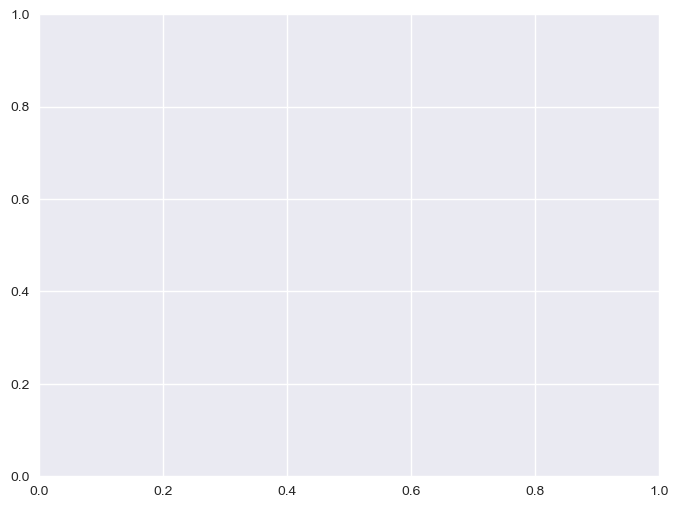

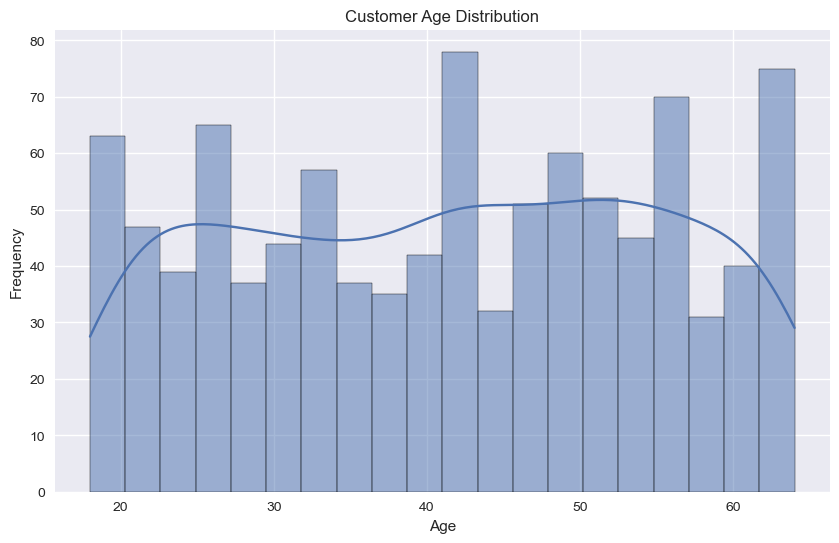

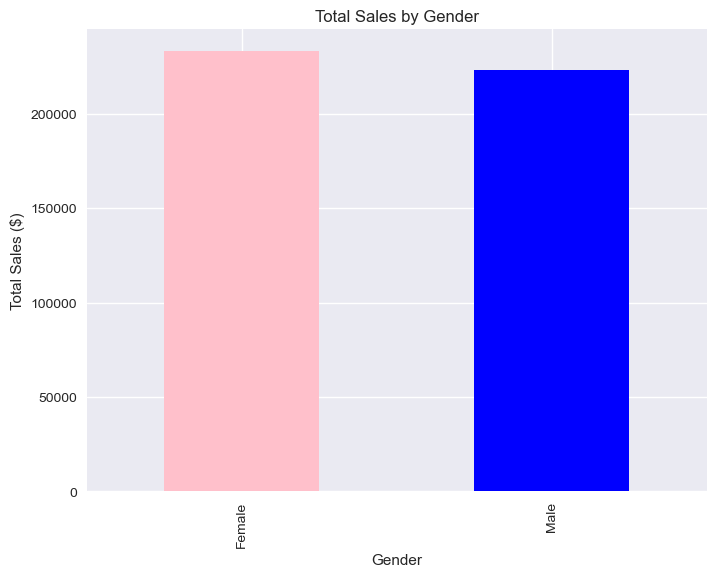

In [104]:
# Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(df2['Age'], bins=20, kde=True)
plt.title('Customer Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Sales by Gender
gender_sales = df2.groupby('Gender')['Total Amount'].sum()
plt.figure(figsize=(8, 6))
gender_sales.plot(kind='bar', color=['pink', 'blue'])
plt.title('Total Sales by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Sales ($)')
plt.show()

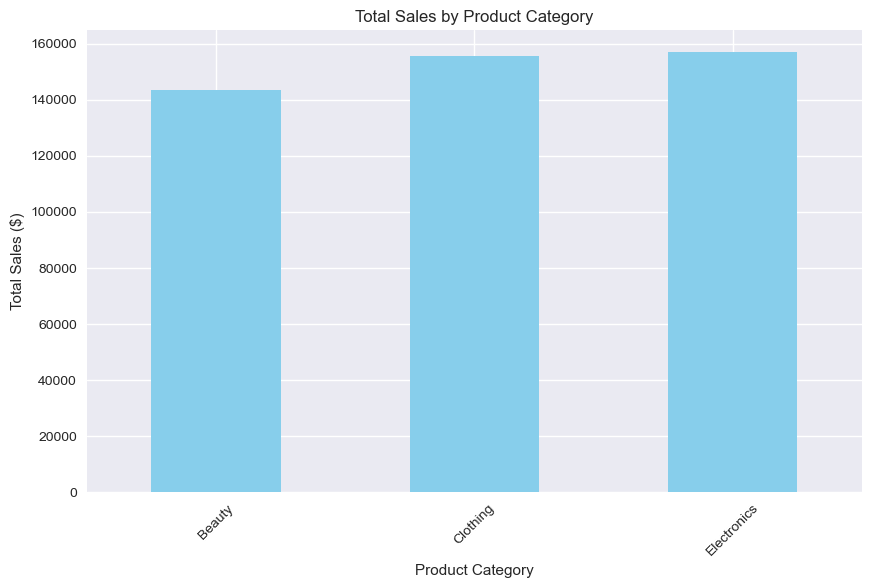

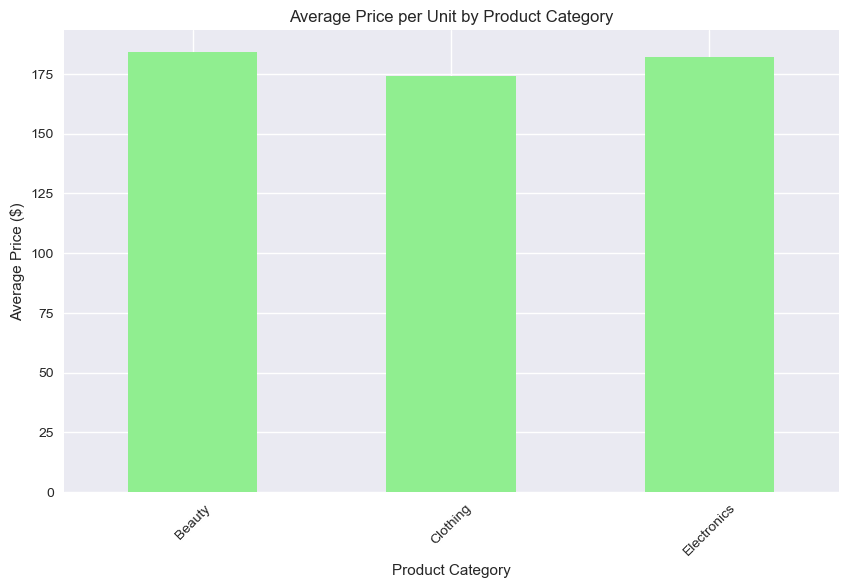

In [86]:
# Sales by Product Category
category_sales = df2.groupby('Product Category')['Total Amount'].sum()
plt.figure(figsize=(10, 6))
category_sales.plot(kind='bar', color='skyblue')
plt.title('Total Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45)
plt.show()

# Average price per unit by category
avg_price = df2.groupby('Product Category')['Price per Unit'].mean()
plt.figure(figsize=(10, 6))
avg_price.plot(kind='bar', color='lightgreen')
plt.title('Average Price per Unit by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=45)
plt.show()

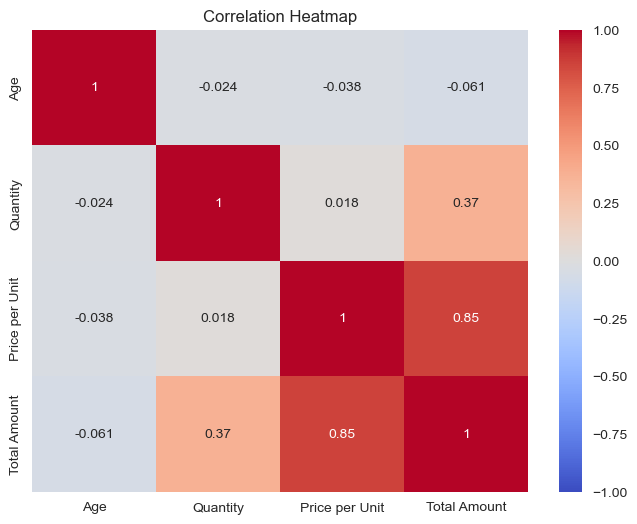

In [88]:
# Correlation matrix (numerical columns only)
numeric_cols = ['Age', 'Quantity', 'Price per Unit', 'Total Amount']
corr_matrix = df2[numeric_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

In [108]:
# Actionable Recommendations with Justification  

# 1. Seasonal Promotions – Run discounts in March and September to prevent sales decline and maximize peaks in May and December.  
#    Sales drop after February and before October, requiring proactive promotions.  

# 2. Targeted Digital Marketing – Focus on customers aged 25–50 using personalized ads and promotions.  
#    This age group has the highest customer distribution, ensuring better ROI on ads.  

# 3. Gender-Neutral Campaigns – Avoid gender-specific marketing; highlight universal product benefits.  
#    Sales data shows no significant difference between male and female customers.  

# 4. Cross-Selling Strategies – Bundle beauty products with electronics and clothing to increase multi-category purchases.  
#    Beauty sales are close to top categories, meaning bundling can boost revenue.  

# 5. Premium Product Offerings – Introduce high-end beauty and electronics items to leverage customers’ willingness to pay.  
#    Beauty and electronics have the highest average unit price (~175), signaling demand for premium items.  

# 6. Loyalty & Subscription Programs – Offer exclusive rewards for repeat buyers to boost retention.  
#    Encouraging repeat purchases can stabilize revenue throughout the year.  

# 7. Dynamic Pricing Strategy – Adjust prices based on demand, seasonal trends, and customer purchasing behavior.  
#    Sales correlate strongly (0.85) with price per unit, meaning pricing adjustments drive revenue.  

# 8. Data-Driven Discounts – Offer price reductions based on sales patterns and customer preferences.  
#    Targeted discounts help sustain demand during sales dips and seasonal slumps.  

# 9. Leverage Peak Sales Months – Prepare inventory and marketing campaigns for May and December in advance.  
#    Sales peak in these months, requiring inventory planning to avoid stockouts.  

# 10. Encourage Bulk Purchases – Provide quantity-based discounts since total amount correlates with quantity sold.  
#     A 0.33 correlation with quantity suggests bulk purchases can drive revenue.  
